In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
data_dir = "/content/gdrive/MyDrive/Batik Dataset Enhanched/Batik"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=270,
                                   zoom_range=0.2,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='wrap',
                                   validation_split=0.25)


In [18]:
train_generator = train_datagen.flow_from_directory(data_dir,
                                                    target_size=(224,224),
                                                    shuffle=True,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(data_dir,
                                                         target_size=(224, 224),
                                                         shuffle=False,
                                                         color_mode='rgb',
                                                         class_mode='categorical',
                                                         subset='validation')

Found 772 images belonging to 20 classes.
Found 244 images belonging to 20 classes.


In [6]:
base_model = tf.keras.applications.Xception(
    include_top=False, weights='imagenet', pooling="max",
    classifier_activation=None
)

model = tf.keras.models.Sequential()

"""for layer in base_model.layers[:-1]:
    model.add(layer)    """

# Freeze the layers 
for layer in base_model.layers:
    layer.trainable = False

# Add 'softmax' instead of earlier 'prediction' layer.
model.add(base_model)
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(20, activation='softmax'))

model.summary()

83689472/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                40980     
Total params: 20,902,460
Trainable params: 40,980
Non-trainable params: 20,861,480
_________________________________________________________________


In [7]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["acc"])

In [8]:
class myCallback(tf.keras.callbacks.Callback):
        # Your Code
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>0.95):
                print("\nReached 95% so cancelling training!")
                self.model.stop_training = True

callbacks = myCallback()

In [9]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=500, steps_per_epoch=15, callbacks=[callbacks])

Epoch 1/500
15/15 [==============================] - 263s 16s/step - loss: 3.7771 - acc: 0.0575 - val_loss: 2.9393 - val_acc: 0.2049
Epoch 2/500
15/15 [==============================] - 72s 5s/step - loss: 3.0776 - acc: 0.1659 - val_loss: 2.7029 - val_acc: 0.2336
Epoch 3/500
15/15 [==============================] - 42s 3s/step - loss: 2.5564 - acc: 0.2667 - val_loss: 2.3465 - val_acc: 0.3033
Epoch 4/500
15/15 [==============================] - 23s 2s/step - loss: 2.3691 - acc: 0.3031 - val_loss: 2.2162 - val_acc: 0.3279
Epoch 5/500
15/15 [==============================] - 19s 1s/step - loss: 2.1077 - acc: 0.3667 - val_loss: 2.2202 - val_acc: 0.3361
Epoch 6/500
15/15 [==============================] - 17s 1s/step - loss: 1.9702 - acc: 0.4159 - val_loss: 2.2307 - val_acc: 0.3525
Epoch 7/500
15/15 [==============================] - 17s 1s/step - loss: 1.8660 - acc: 0.4558 - val_loss: 2.2351 - val_acc: 0.3361
Epoch 8/500
15/15 [==============================] - 17s 1s/step - loss: 1.9455 -

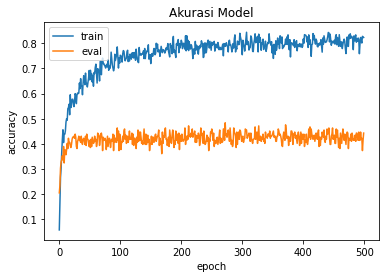

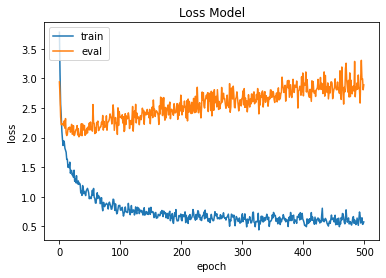

In [10]:
import matplotlib.pyplot as plt

# Accuracy plotting
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'eval'], loc='upper left')
plt.show()

# Loss plotting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'eval'], loc='upper left')
plt.show()

In [11]:
tf.saved_model.save(model, "Batik Classification V5 - Xception")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: Batik Classification V5 - Xception/assets


In [12]:
!zip -r /content/BatikClassificationV5-Xception.zip /content/BatikClassificationV5-Xception

  adding: content/BatikClassificationV5-Xception/ (stored 0%)
  adding: content/BatikClassificationV5-Xception/saved_model.pb (deflated 93%)
  adding: content/BatikClassificationV5-Xception/assets/ (stored 0%)
  adding: content/BatikClassificationV5-Xception/variables/ (stored 0%)
  adding: content/BatikClassificationV5-Xception/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/BatikClassificationV5-Xception/variables/variables.index (deflated 76%)


In [13]:
label = []
import os
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        label.append(os.path.join(dirname, filename).split('/')[-2])

labels = np.unique(label)
ints = np.arange(0, len(label))
dicts = dict(zip(labels, ints))
dicts

{'batik-bali': 0,
 'batik-betawi': 1,
 'batik-celup': 2,
 'batik-cendrawasih': 3,
 'batik-ceplok': 4,
 'batik-ciamis': 5,
 'batik-garutan': 6,
 'batik-gentongan': 7,
 'batik-kawung': 8,
 'batik-keraton': 9,
 'batik-lasem': 10,
 'batik-megamendung': 11,
 'batik-parang': 12,
 'batik-pekalongan': 13,
 'batik-priangan': 14,
 'batik-sekar-jagad': 15,
 'batik-sidoluhur': 16,
 'batik-sidomukti': 17,
 'batik-sogan': 18,
 'batik-tambal': 19}

In [19]:
y_true = validation_generator.classes

print(y_true)

[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6
  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  8
  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11
 11 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15
 15 15 15 15 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 17 17 17 17 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19
 19 19 19 19]


In [20]:
predictions = model.predict(validation_generator)
y_pred = np.rint(predictions)
y_pred = np.argmax(y_pred, axis=1)

print(y_pred)

[ 0  0  0 15  1 15  0 14  3  0  4  0 13  0  0  1  1  1  1  1  0  0  0  0
 10  2  2  2  3  2  2  2  2  2  2  2  3  0 14  7  3 13  0 15  0  6  3  0
  8  0  0  0  1  8  4  8 16  4  8  1  0 13  0  0  5  3 14 14  0 19  1 14
  6  0  0 12  7  0 19 19  8  2 14  0 14 16  0 16  0  0  8 14  7 16 10  8
  8  8  4  8  8  8  8  8  8  8  8  7  0 12 12 13  7  9 14 19  9 18  0  3
  0 10 10  3  0  0  5  6  3 15 10  3  0 11 11 11 11 11  6 11 11 11 11 11
 11 12  8 12 12 12 12  0 11 12 12 12 12  9  3 15  3 13  0 15  3 10  5  0
  0 15  0 14  5 14  0  6 14 11 13 14  0 14 14 16  0 14 15  0 15 15 15 15
 15 15 14 15 16 16 17  9 17  0  4 16 16 17 16  0  0  0  0  0  0  9 17 17
  5 16  0  0  7  7 12 15  0  0 17 19 18  0  3  0 19 16 19 19 19 19 19 18
  6 19 19 19]


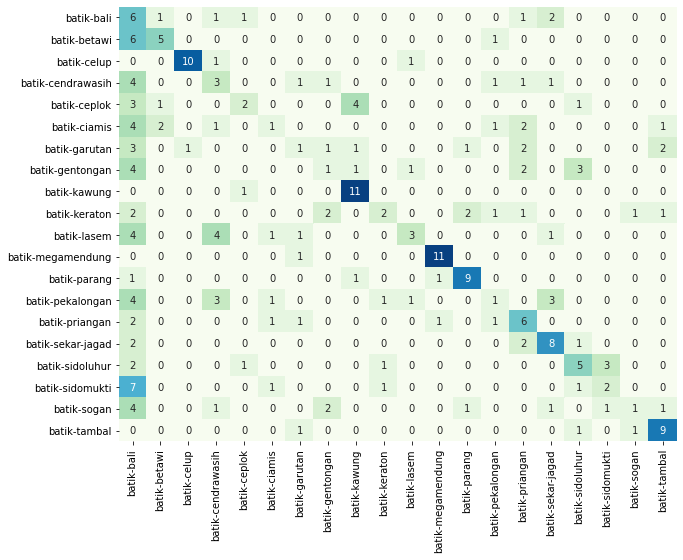

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='GnBu', cbar=False)
plt.xticks(ticks=np.arange(0.5, len(list(dicts.keys()))), labels = list(dicts.keys()), rotation=90)
plt.yticks(ticks=np.arange(0.5, len(list(dicts.keys()))), labels = list(dicts.keys()), rotation=0)
plt.show()

In [22]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.50      0.17        12
           1       0.56      0.42      0.48        12
           2       0.91      0.83      0.87        12
           3       0.21      0.25      0.23        12
           4       0.40      0.18      0.25        11
           5       0.20      0.08      0.12        12
           6       0.17      0.08      0.11        12
           7       0.14      0.08      0.11        12
           8       0.61      0.92      0.73        12
           9       0.40      0.17      0.24        12
          10       0.50      0.21      0.30        14
          11       0.85      0.92      0.88        12
          12       0.69      0.75      0.72        12
          13       0.17      0.07      0.10        14
          14       0.35      0.50      0.41        12
          15       0.50      0.62      0.55        13
          16       0.42      0.42      0.42        12
          17       0.33    